<a href="https://colab.research.google.com/github/asepmuhidin/AI-UPB/blob/main/gender_cla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fdata="https://raw.githubusercontent.com/asepmuhidin/AI-UPB/refs/heads/main/dataset/gender_classification_v7.csv"

df = pd.read_csv(fdata)
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [3]:
#Cek Jumlah data, jumlah duplikasi, dan jumlah setelah dihapus baris duplikasi
print(f"Jumlah data : {df.shape[0]}")
print(f"Jumlah data duplikasi : {df[df.duplicated()].shape[0]}")
#Drop duplicated
df.drop_duplicates(inplace=True)
print(f"Jumlah setelah dihapus data duplikasi : {df.shape[0]}")

Jumlah data : 5001
Jumlah data duplikasi : 1768
Jumlah setelah dihapus data duplikasi : 3233


In [4]:
df.isnull().sum()

,0
long_hair,0
forehead_width_cm,0
forehead_height_cm,0
nose_wide,0
nose_long,0
lips_thin,0
distance_nose_to_lip_long,0
gender,0


In [5]:
from sklearn.model_selection import train_test_split
y=df.gender
X=df.drop("gender", axis=1)

In [6]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2, shuffle=True, stratify=y,random_state=12)
print(f"Jumlah data train : {len(x_train)}")
print(f"Jumlah data test : {len(x_test)}")

Jumlah data train : 2586
Jumlah data test : 647


In [9]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

In [10]:
scl=StandardScaler()
x_train_scl=scl.fit_transform(x_train)
x_test_scl=scl.transform(x_test)

lbl_encoder=LabelEncoder()
y_train_enc=lbl_encoder.fit_transform(y_train)
y_test_enc=lbl_encoder.transform(y_test)

In [11]:
x_train

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
862,1,11.4,6.4,0,1,0,0
183,1,12.2,5.4,0,0,0,0
222,0,13.0,6.2,0,0,0,1
4229,0,12.4,6.2,0,0,0,0
2299,1,14.1,6.8,1,1,1,1
...,...,...,...,...,...,...,...
586,1,13.8,5.8,1,0,1,0
769,0,12.9,6.0,0,0,0,0
1634,1,11.7,5.3,0,1,1,1
649,1,11.4,5.1,0,0,0,0


In [12]:
x_train_scl

array([[ 0.4663841 , -1.63784943,  0.79225463, ...,  0.88512614,
        -1.07973568, -1.10614636],
       [ 0.4663841 , -0.91723888, -1.03537291, ..., -1.12978248,
        -1.07973568, -1.10614636],
       [-2.14415545, -0.19662832,  0.42672912, ..., -1.12978248,
        -1.07973568,  0.9040395 ],
       ...,
       [ 0.4663841 , -1.36762047, -1.21813567, ...,  0.88512614,
         0.92615259,  0.9040395 ],
       [ 0.4663841 , -1.63784943, -1.58366117, ..., -1.12978248,
        -1.07973568, -1.10614636],
       [ 0.4663841 ,  0.3438296 , -0.6698474 , ..., -1.12978248,
        -1.07973568, -1.10614636]])

In [13]:
y_train

,gender
862,Female
183,Female
222,Female
4229,Female
2299,Male
...,...
586,Male
769,Female
1634,Male
649,Female


In [14]:
y_train_enc

array([0, 0, 0, ..., 1, 0, 0])

In [15]:
from sklearn.neighbors import KNeighborsClassifier

In [16]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(x_train_scl, y_train_enc)

KNeighborsClassifier()

In [17]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [18]:
knn_predictions = knn_classifier.predict(x_test_scl)
knn_accuracy = accuracy_score(y_test_enc, knn_predictions)

print(f'KNN accuracy: {knn_accuracy:.2f}')

KNN accuracy: 0.94


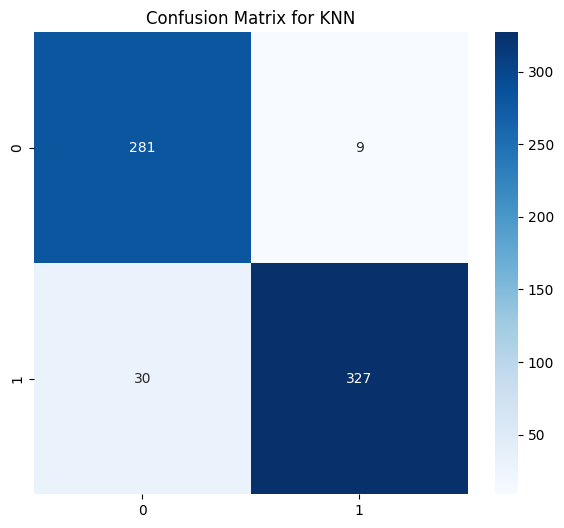

In [19]:
cm=confusion_matrix(y_test_enc,knn_predictions)
plt.figure(figsize=(7, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

plt.title('Confusion Matrix for KNN')
plt.show()

In [20]:
from sklearn.model_selection import cross_val_score

In [21]:
knn=KNeighborsClassifier(n_neighbors=5)
score_sc=cross_val_score(knn,x_train_scl,y_train_enc,cv=5)
print(score_sc)
print(f"Rata score dengan 5 fold : {score_sc.mean()}")

[0.94787645 0.96711799 0.94390716 0.92843327 0.94584139]
Rata score dengan 5 fold : 0.94663525089057


In [22]:
n_=range(1,51,2)
train,test=[],[]
for n in n_:
  knn=KNeighborsClassifier(n_neighbors=n)
  knn.fit(x_train_scl,y_train_enc)
  train.append(knn.score(x_train_scl,y_train_enc))
  test.append(knn.score(x_test_scl,y_test_enc))

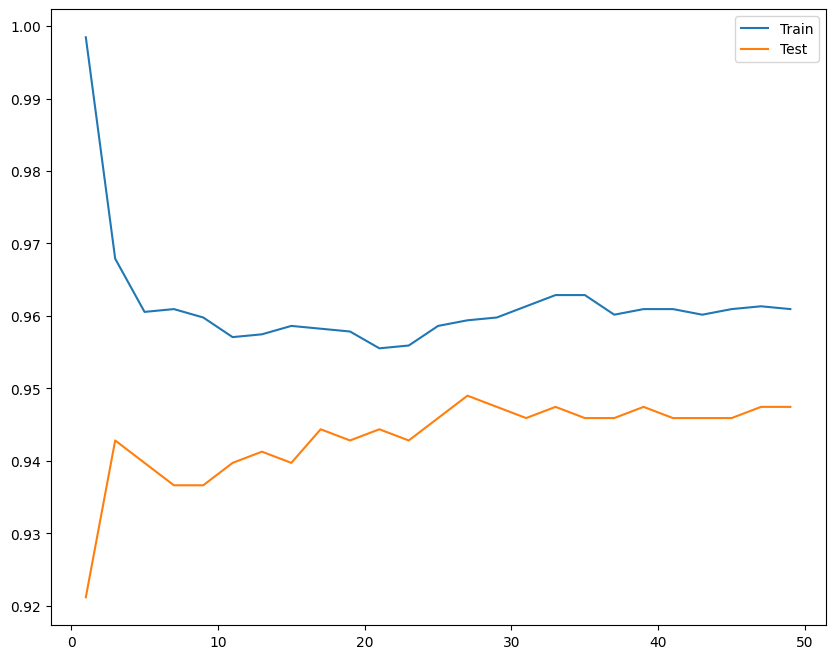

In [23]:
plt.figure(figsize=(10,8))
plt.plot(n_,train, label='Train')
plt.plot(n_,test, label='Test')

plt.legend()
plt.show()

In [24]:
print(f"Max Test Score adalah {np.max(test)}")
print(f"K Neighboard terbaik adalah {n_[np.argmax(test)]}")

Max Test Score adalah 0.9489953632148377
K Neighboard terbaik adalah 27
